In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

In [2]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

In [3]:
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [4]:
plt.figure(figsize=(12,12))
colormap = np.array(['red', 'lime', 'black'])

<Figure size 864x864 with 0 Axes>

Text(0, 0.5, 'Petal Width')

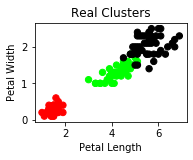

In [5]:
plt.subplot(2, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

Text(0, 0.5, 'Petal Width')

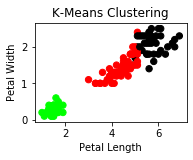

In [6]:
plt.subplot(2, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K-Means Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')


In [7]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
xsa=scaler.transform(X)
xs=pd.DataFrame(xsa,columns=X.columns)
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=3)
gmm.fit(xs)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

Text(0, 0.5, 'Petal Width')

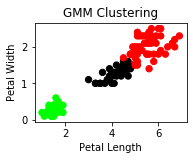

In [9]:
gmm_y=gmm.predict(xs)
plt.subplot(2,2,3)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[gmm_y],s=40)
plt.title('GMM Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [10]:
print('Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans')
plt.show()

Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans
